In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# work with the fastai V1 library which sits on top of Pytorch 1.0
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd

In [4]:
df = pd.read_csv('/home/jramsay/train_labels.csv')
df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [5]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [6]:
np.random.seed(42)
src = (ImageItemList.from_csv('/home/jramsay/', 'train_labels.csv', folder='train_img_crop', suffix='.tif')
       .random_split_by_pct(0.2)
       .label_from_df(sep=' '))
       #.add_test_folder(test_folder='test_img'))

In [16]:
data = (src.transform(tfms, size=64)
        .databunch().normalize(imagenet_stats))

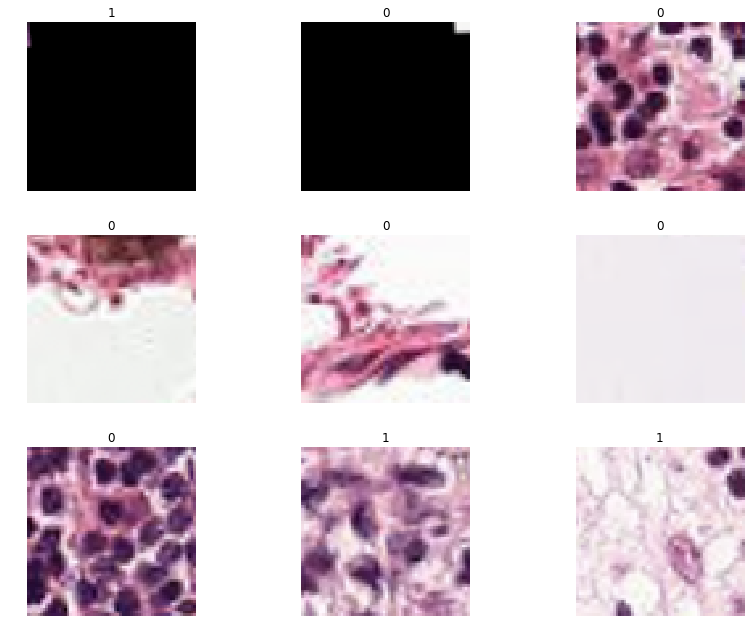

In [17]:
data.show_batch(rows=3, figsize=(12,9))

In [9]:
arch = models.resnet50
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = create_cnn(data, arch, metrics=[acc_02, f_score])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


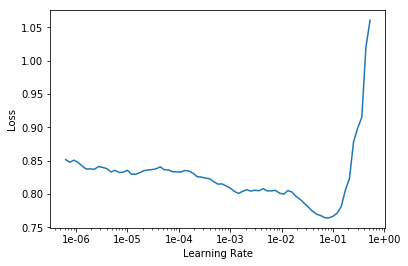

In [10]:
learn.lr_find()
learn.recorder.plot()

In [16]:
lr=3e-2

In [17]:
learn.fit_one_cycle(3, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.248695,0.208353,0.920180,0.944729
2,0.189440,0.159078,0.920168,0.957300
3,0.160687,0.126056,0.939052,0.966488


In [18]:
#learn.save('stage-1-96-rn50')

In [19]:
learn.unfreeze()

In [20]:
learn.fit_one_cycle(8, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.169553,0.173379,0.918009,0.951490
2,0.171914,0.138919,0.933939,0.962890
3,0.157696,0.129437,0.940677,0.966864
4,0.129191,0.124822,0.942097,0.967155
5,0.127327,0.109932,0.947074,0.971389
6,0.103686,0.095044,0.956959,0.975352
7,0.097725,0.087675,0.960209,0.977541
8,0.106520,0.086887,0.959982,0.977889


In [21]:
''' 
Code below here has not run yet
'''

' \nCode below here has not run yet\n'

In [22]:
# Save model
learn.save('stage-2-96-rn50')

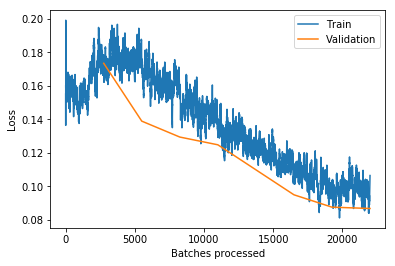

In [23]:
# Plot losses
learn.recorder.plot_losses()

In [ ]:
''' 
Code below here is to make predictions and submission
'''

In [24]:
preds, y_test = learn.get_preds(ds_type=DatasetType.Test)

In [25]:
sub=pd.read_csv('/home/jramsay/sample_submission.csv').set_index('id')
sub.head()

,label
id,
0b2ea2a822ad23fdb1b5dd26653da899fbd2c0d5,0
95596b92e5066c5c52466c90b69ff089b39f2737,0
248e6738860e2ebcf6258cdc1f32f299e0c76914,0
2c35657e312966e9294eac6841726ff3a748febf,0
145782eb7caa1c516acbe2eda34d9a3f31c41fd6,0


In [26]:
clean_fname=np.vectorize(lambda fname: str(fname).split('/')[-1].split('.')[0])
fname_cleaned=clean_fname(data.test_ds.items)
fname_cleaned=fname_cleaned.astype(str)

In [27]:
sub.loc[fname_cleaned,'label']=to_np(preds[:,1])
sub.to_csv('cancer_sub_v2_959.csv')

In [34]:
'''
New renet101 implementation
'''

'\nNew renet101 implementation\n'

In [9]:
arch = models.resnet101
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = create_cnn(data, arch, metrics=[acc_02, f_score])

learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: 

In [35]:
lr=1e-2
learn.fit_one_cycle(3, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.213743,0.185941,0.905420,0.950339
2,0.157754,0.149314,0.936769,0.960758
3,0.140276,0.122050,0.941370,0.968579


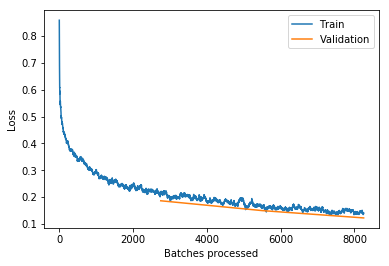

In [37]:
# Plot losses
learn.recorder.plot_losses()

In [38]:
# Save model
learn.save('stage-1-96-rn101')

In [10]:
learn.load('stage-1-96-rn101')

Learner(data=ImageDataBunch;

Train: LabelList
y: MultiCategoryList (176020 items)
[MultiCategory 0, MultiCategory 1, MultiCategory 0, MultiCategory 0, MultiCategory 0]...
Path: /home/jramsay
x: ImageItemList (176020 items)
[Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96)]...
Path: /home/jramsay;

Valid: LabelList
y: MultiCategoryList (44005 items)
[MultiCategory 0, MultiCategory 1, MultiCategory 0, MultiCategory 0, MultiCategory 1]...
Path: /home/jramsay
x: ImageItemList (44005 items)
[Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96)]...
Path: /home/jramsay;

Test: LabelList
y: EmptyLabelList (57458 items)
[EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel ]...
Path: .
x: ImageItemList (57458 items)
[Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96), Image (3, 96, 96)]...
Path: /home/jramsay, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel

In [13]:
lr=1e-2
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.185897,0.167525,0.915475,0.955145
2,0.159048,0.146849,0.929724,0.961133
3,0.134552,0.112243,0.944518,0.970477
4,0.113252,0.096333,0.956959,0.975109
5,0.090980,0.087146,0.961141,0.977790


Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f65f56862f0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f65f56862f0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/opt/anaconda3/lib/python3.7/multiprocessi

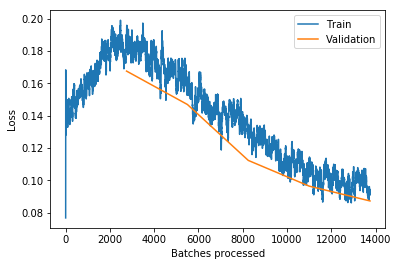

In [14]:
# Plot losses
learn.recorder.plot_losses()